<a href="https://www.kaggle.com/code/llkh0a/titanic-survival-analysis-insights?scriptVersionId=258279773" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚢 Titanic Dataset Exploratory Data Analysis (EDA)
This notebook performs a comprehensive EDA on the Titanic dataset to uncover insights and prepare for machine learning modeling.

for models and training progress -> [🚢 Predict Titanic Survival with ML 🌊](https://www.kaggle.com/code/llkh0a/predict-titanic-survival-with-ml/notebook)

Thank you for spending your time reviewing this notebook ⸜(｡˃ ᵕ ˂ )⸝♡

![](https://i.imgur.com/ZYn9Wuq.png)

[](![]https://imgur.com/a/Rrg6Xdq)

In [1]:
# Load Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Suppress warnings globally
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the datasets
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## General Information about the Dataset
Display the shape, data types, and missing values in the dataset.

In [3]:
# General information
print('Shape of training data:', train_data.shape)
print('Shape of test data:', test_data.shape)
print('Data Types:')
print(train_data.dtypes)
print('Missing Values:')
print(train_data.isnull().sum())

Shape of training data: (891, 12)
Shape of test data: (418, 11)
Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Summary Statistics
Provide summary statistics for numerical and categorical features.

In [4]:
# Summary statistics
print(train_data.describe(include=[np.number]))
print(train_data.describe(include=[object]))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                           Name   Sex  Ticket    Cabin Embarked
count            

## Visualizing Missing Data
Use a heatmap to visualize missing data.

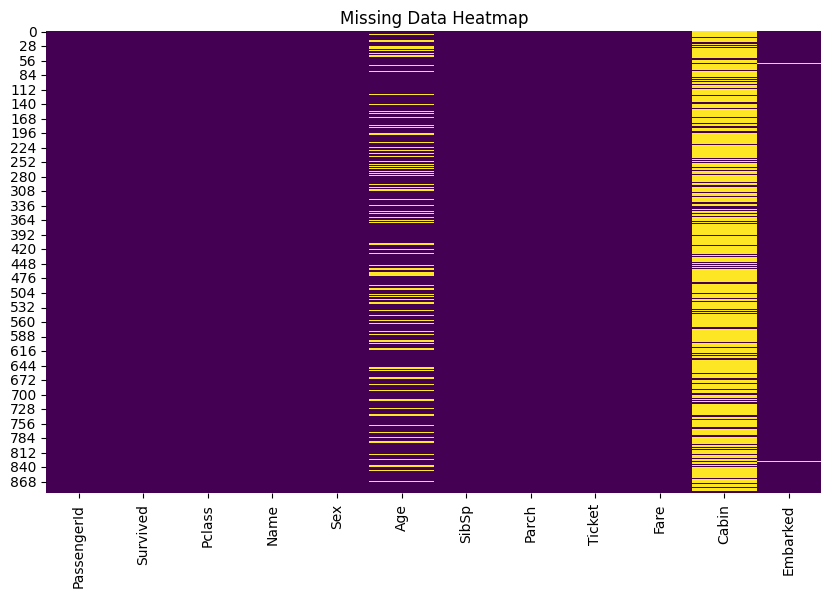

In [5]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## Feature Distributions
Analyze the distribution of features like Age, Fare, Pclass, Sex, and Embarked.

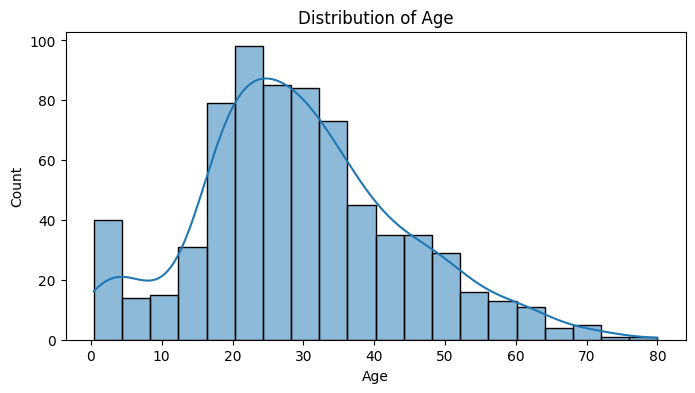

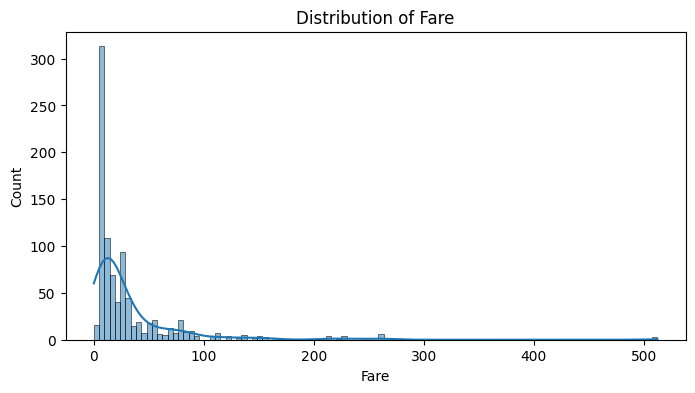

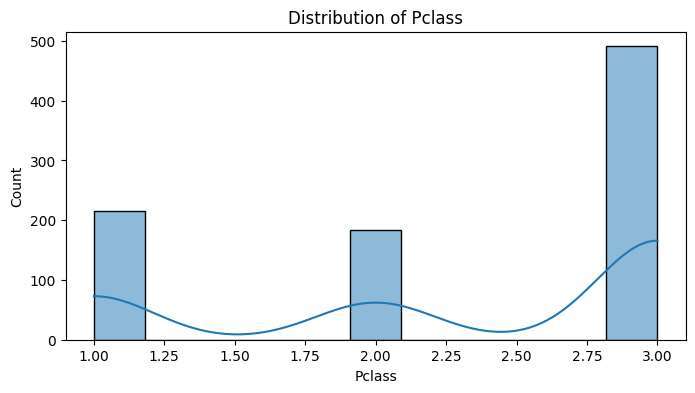

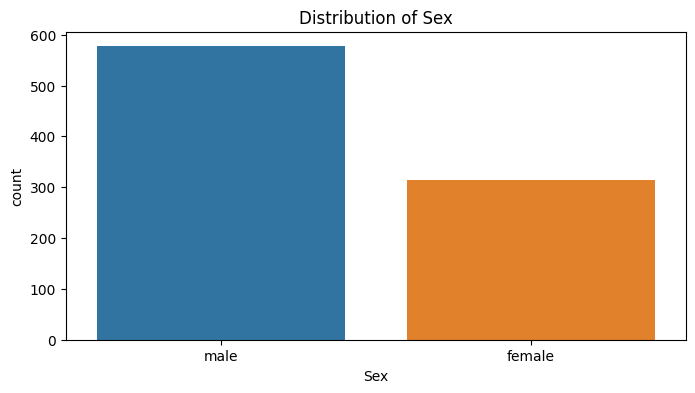

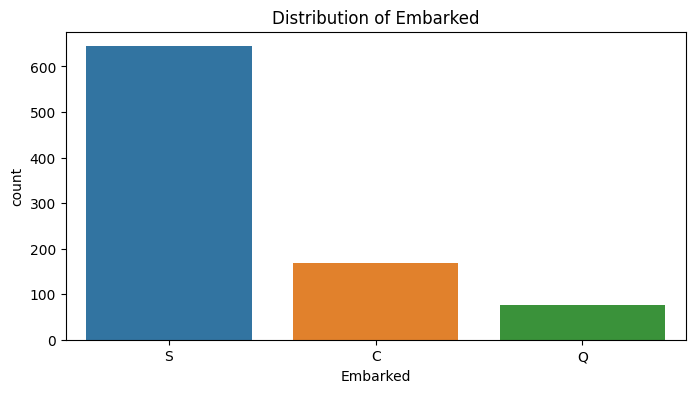

In [6]:
# Suppress the FutureWarning by removing the deprecated use_inf_as_na option
# Replace the deprecated option context with explicit handling of inf values
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Feature distributions
features = ['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']
for feature in features:
    plt.figure(figsize=(8, 4))
    if train_data[feature].dtype == 'object':
        sns.countplot(data=train_data, x=feature)
    else:
        sns.histplot(data=train_data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

*📊 Notes on Feature Distributions*


Sex 👩‍🦰👨: There were more male passengers than female — a noticeable imbalance in gender distribution.

Pclass 🛳️: Most passengers traveled in 3rd class, with fewer in 1st and 2nd. Looks like economy was the popular choice!

Fare 💸: The fare distribution is super skewed — most people paid lower fares, but there are a few who paid a lot more. Definitely some first-class luxury going on. 😎

Age 🎂: The age distribution is roughly bell-shaped, peaking in the 20s–30s. There were fewer kids and seniors on board.

Embarked 🚢: The majority of passengers boarded at Southampton (S), followed by Cherbourg (C) and Queenstown (Q). Southampton was clearly the main port of departure.

## Feature Relationships with Target
Explore relationships between features and the target variable Survived.

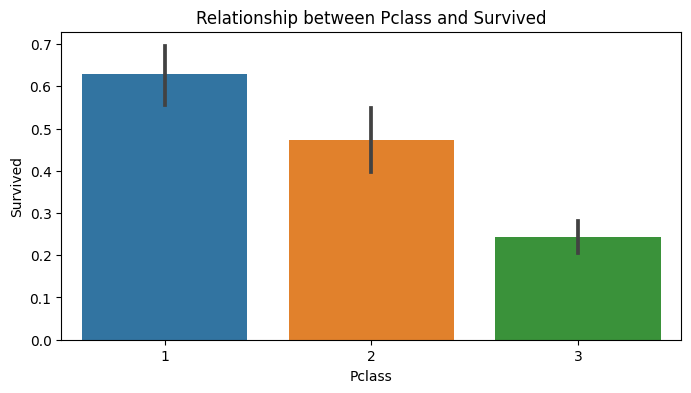

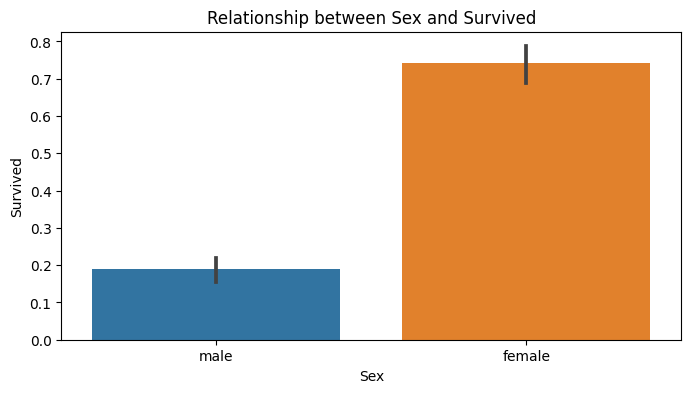

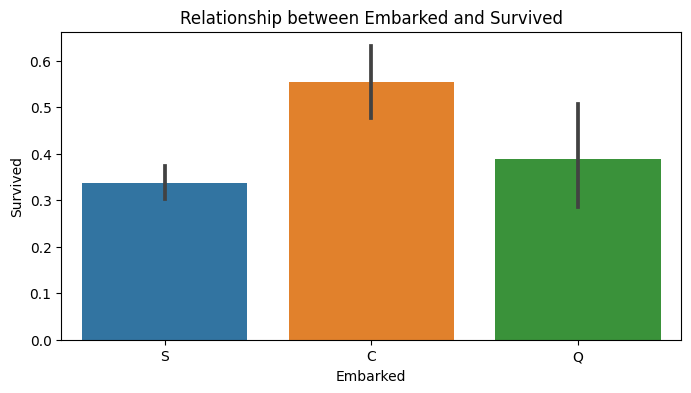

In [7]:
# Updated to use scatter plots for continuous features like 'Age' and 'Fare'
features = ['Pclass', 'Sex', 'Embarked']
for feature in features:
    plt.figure(figsize=(8, 4))

    sns.barplot(data=train_data, x=feature, y='Survived')
    plt.title(f'Relationship between {feature} and Survived')
    plt.show()

*📝 Notes & Insights*

Sex 👩‍🦰👨‍🦱: Even though there were way more male passengers on board, most of the survivors were actually female. This clearly shows that gender played a major role in survival — think “women and children first”! 🚢❤️

Pclass 🛏️: Most people traveled in 3rd class, but a large chunk of the survivors came from 1st class. It looks like having a higher ticket class — and maybe better access to lifeboats — gave passengers a much better shot at surviving. 💸🎟️

Embarked 🚉: The majority of passengers boarded at Southampton (S), but those who got on at Cherbourg (C) actually had a higher survival rate. This might point to differences in wealth, cabins, or even proximity to lifeboats. Something worth digging deeper into! 🔍📍

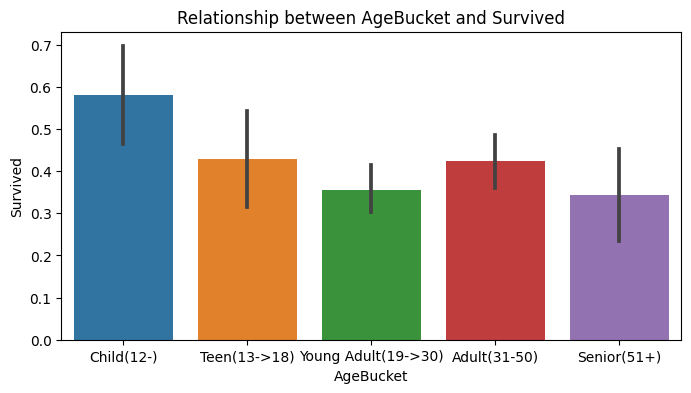

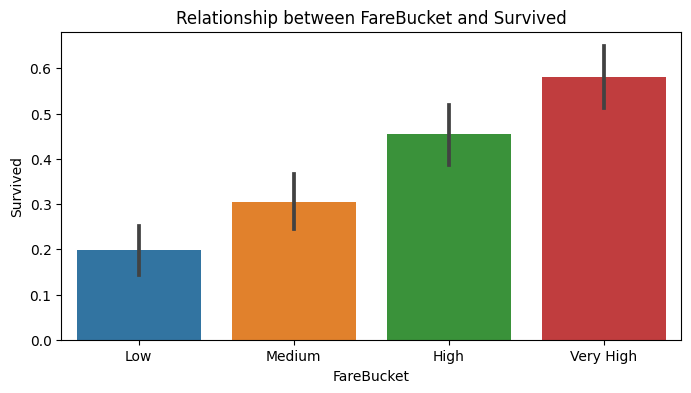

In [8]:
# Bucket 'Age' and 'Fare' into categories and create bar graphs
# Define age buckets
train_data['AgeBucket'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child(12-)', 'Teen(13->18)', 'Young Adult(19->30)', 'Adult(31-50)', 'Senior(51+)'])

# Define fare buckets
train_data['FareBucket'] = pd.qcut(train_data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Plot bar graphs for AgeBucket and FareBucket
for feature in ['AgeBucket', 'FareBucket']:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=train_data, x=feature, y='Survived')
    plt.title(f'Relationship between {feature} and Survived')
    plt.show()

*📝 Notes & Insights*

Fare 💰: Passengers who paid higher fares — usually those in 1st class — had noticeably better survival chances. This matches up with what we saw for Pclass. Turns out, money did make a difference when it came to surviving the Titanic. 🎟️⛴️

Age 👶🧔‍♂️👵: Younger passengers, especially children, had higher survival rates compared to adults and seniors. This supports the idea that age mattered — possibly due to evacuation priorities or physical ability during the chaos. 👣🚨




## Correlation Heatmap
Generate a heatmap to visualize correlations between numerical features.

In [9]:
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

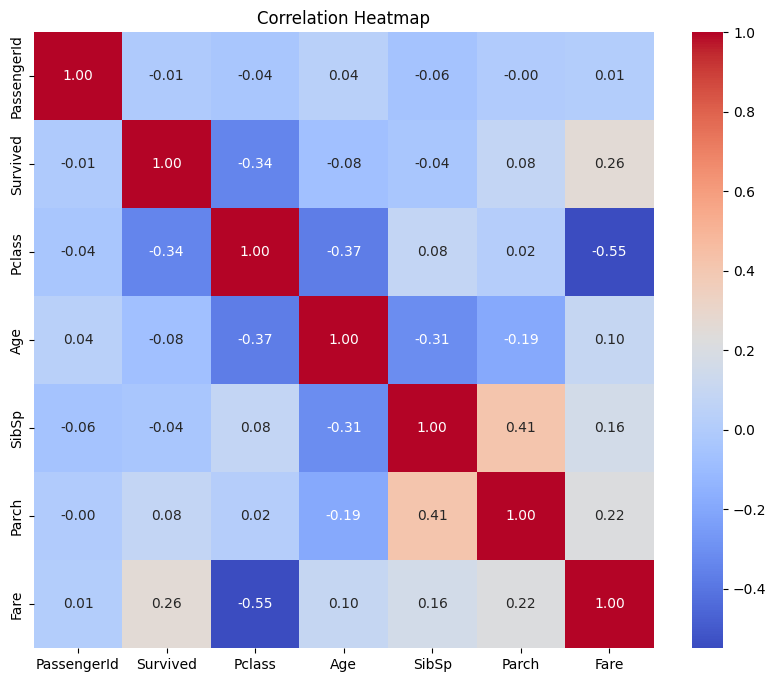

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

we can see a strong negative correlation (-0.34)  between `Pclass` and `Survival`

This indicates that passengers in higher classes (lower Pclass values) had a better chance of survival.

## Exploring Family Size
Analyze the impact of family size on survival by combining SibSp and Parch into a new feature.

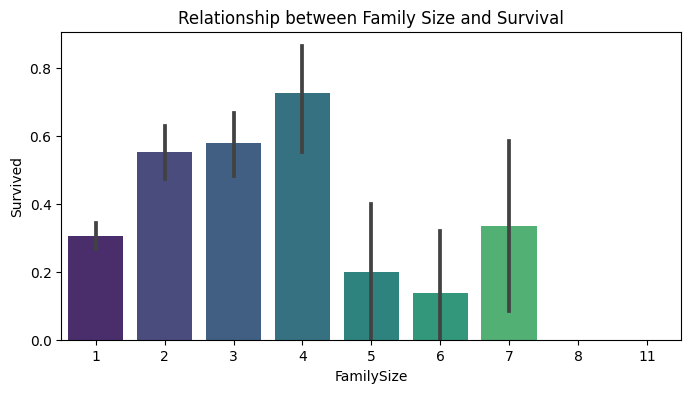

In [11]:
# Create FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
# Analyze the relationship between FamilySize and Survived
plt.figure(figsize=(8, 4))
sns.barplot(data=train_data, x='FamilySize', y='Survived', palette='viridis')
plt.title('Relationship between Family Size and Survival')
plt.show()

*📝 Notes & Insights*

Family Size 👨‍👩‍👧‍👦: Passengers with small to medium family sizes had better survival rates compared to those traveling alone or with very large families. This suggests that having some family support was beneficial, but overcrowding might have been a disadvantage. 🛟❤️

## Extracting Titles from Names
Extract titles (e.g., Mr., Mrs., Miss) from the Name column and analyze their impact on survival.

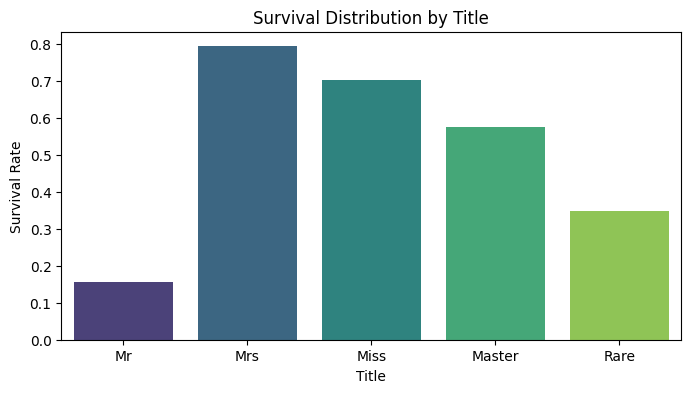

In [12]:
# Updated create_title_feature function
def create_title_feature(data):
    # Create a copy to avoid modifying the original
    data = data.copy()
    
    # Extract title from name using regex
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Group rare titles
    rare_titles = ['Dona', 'Lady', 'Countess', 'Capt', 'Col', 'Don', 
                  'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
    
    # Normalize titles
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].replace(rare_titles, 'Rare')
    
    
    return data
train_data = create_title_feature(train_data)

# Distribution of survival by Title
plt.figure(figsize=(8, 4))
sns.barplot(data=train_data, x='Title', y='Survived', ci=None, palette='viridis')
plt.title('Survival Distribution by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.show()

*📝 Notes & Insights*

Titles 🎩: Titles like 'Mrs.' and 'Miss' had higher survival rates, reflecting the 'women and children first' policy. Meanwhile, titles like 'Mr.' had lower survival rates, highlighting the gender disparity in survival chances. 🚢👩‍🦰

## analyzing age data versus pclass, sex, title

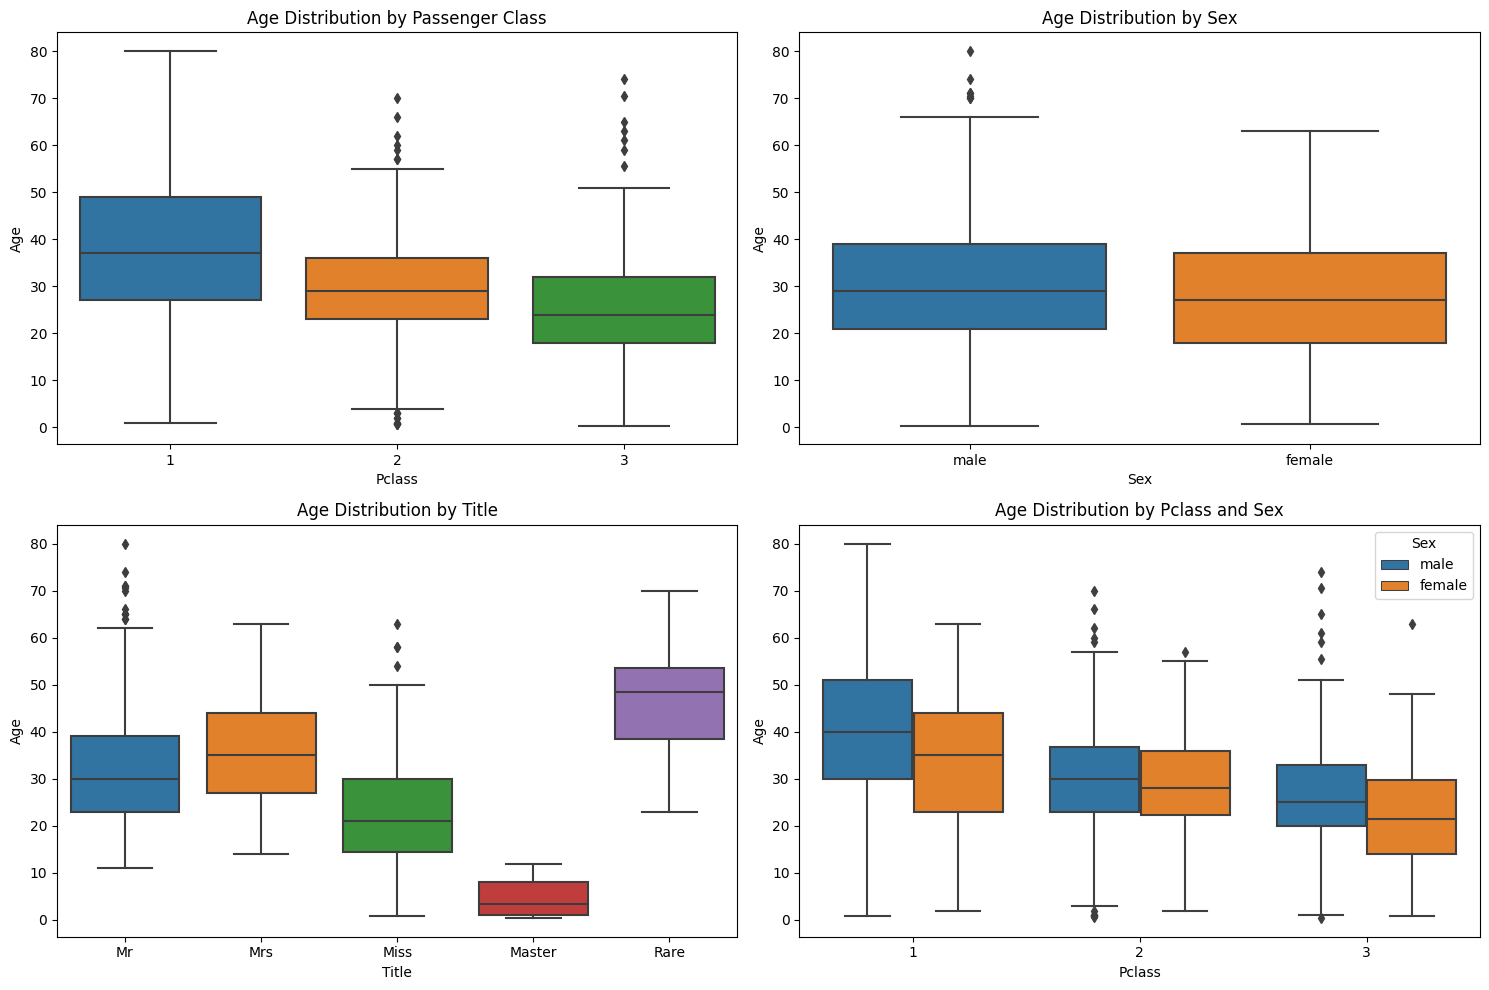

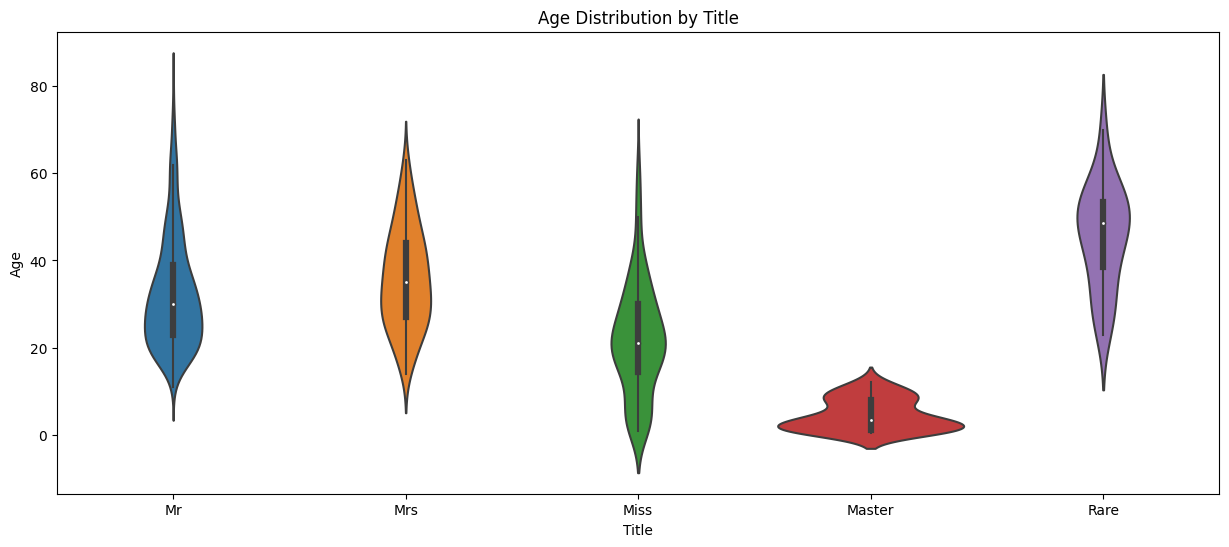

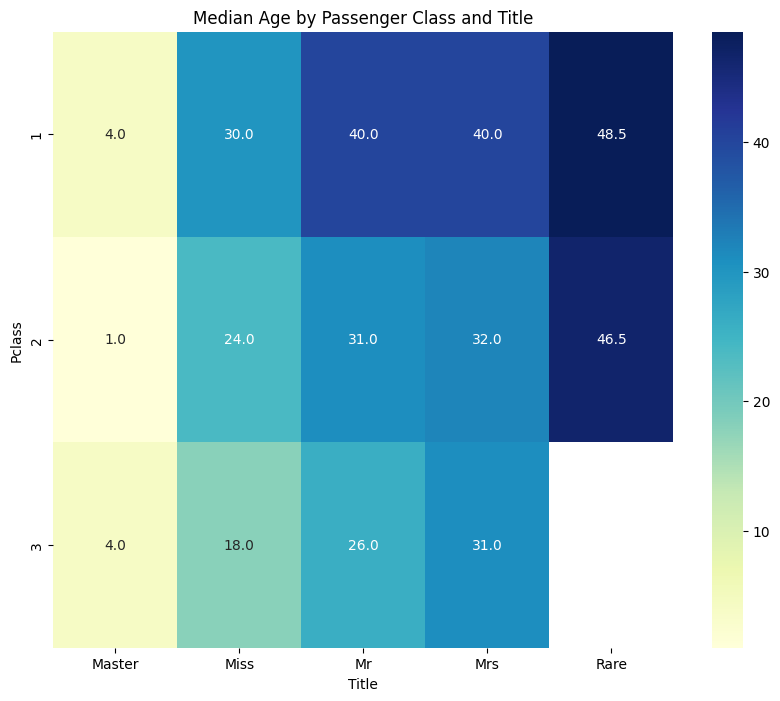

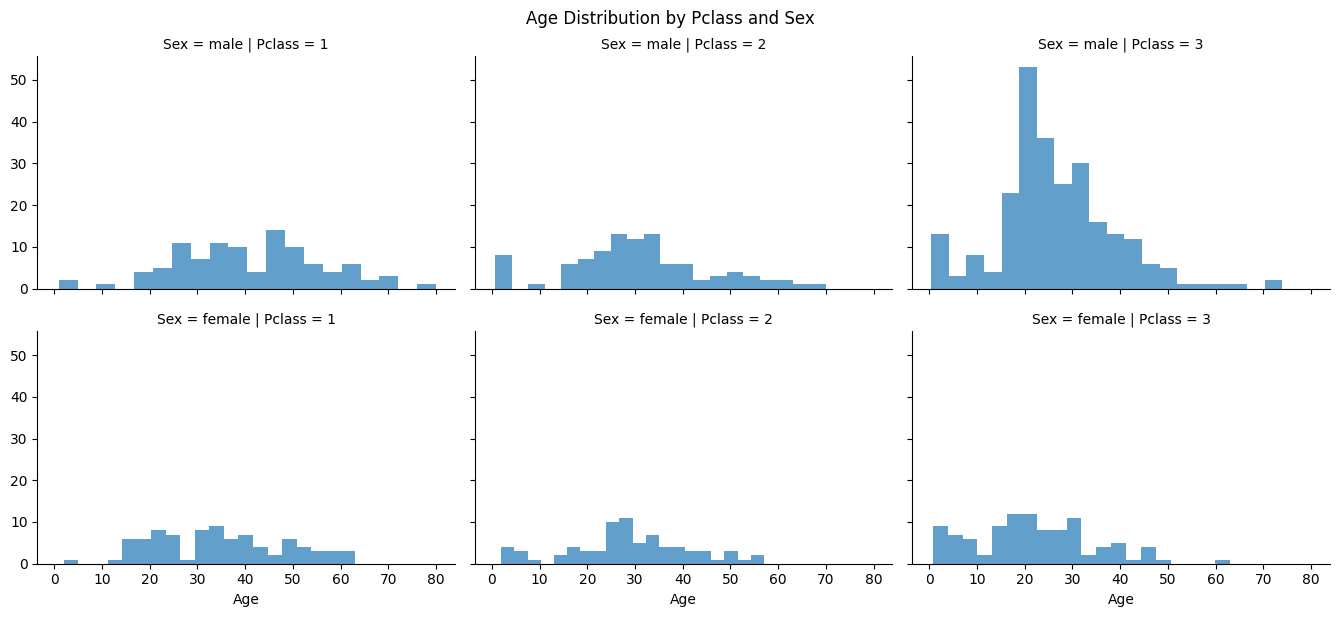

In [13]:
# Assuming train_data is your Titanic dataframe
# Create figure for boxplots
plt.figure(figsize=(15, 10))

# 1. Box plots
plt.subplot(2, 2, 1)
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.title('Age Distribution by Passenger Class')

plt.subplot(2, 2, 2)
sns.boxplot(x='Sex', y='Age', data=train_data)
plt.title('Age Distribution by Sex')

plt.subplot(2, 2, 3)
sns.boxplot(x='Title', y='Age', data=train_data)
plt.title('Age Distribution by Title')

plt.subplot(2, 2, 4)
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train_data)
plt.title('Age Distribution by Pclass and Sex')
plt.tight_layout()
plt.savefig('age_boxplots.png')

# 2. Violin plots
plt.figure(figsize=(15, 6))
sns.violinplot(x='Title', y='Age', data=train_data)
plt.title('Age Distribution by Title')
plt.savefig('age_title_violin.png')

# 3. Heatmap of median age by Pclass and Title
plt.figure(figsize=(10, 8))
age_heatmap = train_data.pivot_table(values='Age', index='Pclass', columns='Title', aggfunc='median')
sns.heatmap(age_heatmap, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Median Age by Passenger Class and Title')
plt.savefig('age_heatmap.png')

# 4. Faceted histogram
g = sns.FacetGrid(train_data, col='Pclass', row='Sex', height=3, aspect=1.5)
g.map(plt.hist, 'Age', bins=20, alpha=0.7)
g.fig.suptitle('Age Distribution by Pclass and Sex', y=1.02)
plt.savefig('age_faceted_hist.png')

*📝 Notes & Insights*

Age 🎂: Age distribution reveals clear patterns across Pclass, Title, and Sex. Passengers in higher classes (1st class) were generally older, reflecting wealthier demographics. Titles like 'Master' indicate younger passengers, while 'Mrs.' and 'Mr.' show older age groups. Additionally, females in 1st class were older on average compared to those in 3rd class, highlighting socio-economic differences. 🛳️💼

## Analyzing Ticket Information
Explore patterns in the Ticket column, such as shared ticket numbers, which might indicate group travel.

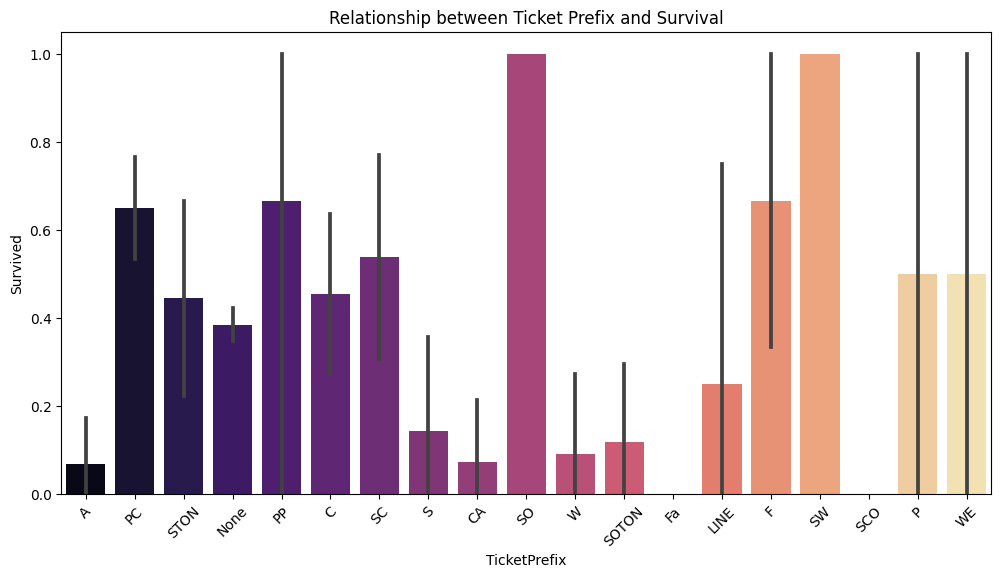

In [14]:
# Analyze ticket prefixes
train_data['TicketPrefix'] = train_data['Ticket'].str.extract('([A-Za-z]+)', expand=False)
train_data['TicketPrefix'] = train_data['TicketPrefix'].fillna('None')
# Plot survival rates by ticket prefix
plt.figure(figsize=(12, 6))
sns.barplot(data=train_data, x='TicketPrefix', y='Survived', palette='magma')
plt.title('Relationship between Ticket Prefix and Survival')
plt.xticks(rotation=45)
plt.show()

*📝 Notes & Insights*

Ticket Prefixes 🎟️: Passengers with certain ticket prefixes, often associated with higher-class cabins, had better survival rates. This reinforces the idea that wealth and class played a significant role in survival. 💸🛳️

## 🚢 Final Summary & Key Takeaways

### 🔑 Key Insights:
- **👩‍🦰 Gender**: Females had a much higher survival rate than males — 'women and children first' policy in action!
- **💼 Class**: 1st class passengers had better survival chances than 2nd or 3rd class — wealth mattered!
- **🎂 Age**: Kids and younger passengers had higher survival rates — priority evacuation for the young.
- **💸 Fare**: Higher ticket fares meant better survival odds — luxury had its perks.
- **📍 Embarked**: Passengers from Cherbourg (C) had higher survival rates than other ports.
- **👨‍👩‍👧‍👦 Family Size**: Small to medium families survived better than solo travelers or large groups.
- **🎩 Titles**: Titles like 'Mrs.' and 'Miss' had higher survival rates, reflecting gender and age priorities.

### 🛠️ Tips for Model Training:
- **Feature Engineering**: Create features like 'FamilySize', 'AgeBucket', 'FareBucket', and 'Title'.
- **Handle Missing Data**: Impute missing values in 'Age' and 'Cabin' smartly.
- **Categorical Encoding**: Convert 'Sex', 'Embarked', and 'Title' into numbers.
- **Scaling**: Normalize 'Age' and 'Fare' for better model performance.
- **Feature Selection**: Focus on impactful features like 'Pclass', 'Sex', 'Fare', and 'FamilySize'.
- **Model Evaluation**: Use cross-validation to avoid overfitting.

By applying these insights, you can build a strong predictive model for Titanic survival! 🧠📊

Hope you find this notebook helpful, thanks for reviewing my work :)